In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def Suscetivel (s, i, beta, b, u) :
    return s * b - (beta*s*i) - s*u
def infectado (s ,i ,beta ,teta ,u ) :
    return ( beta*s*i) - u*i - teta * i
def rk4_si_step (s , i ,beta ,dt ,b , u , teta ) :
    # Calculos para Suscetiveis
    k1_s = dt * Suscetivel (s , i , beta ,b , u )
    k2_s = dt * Suscetivel ( s + dt/2* k1_s , i + dt/2* k1_s ,
    beta ,b , u )
    k3_s = dt * Suscetivel ( s + dt/2* k2_s , i + dt/2* k2_s ,
    beta ,b , u )
    k4_s = dt * Suscetivel ( s + k3_s , i + k3_s , beta ,b , u )
    # Calculos para Infectados
    k1_i = dt * infectado (s , i , beta , teta , u )
    k2_i = dt * infectado ( s + dt/2* k1_i , i + dt/2* k1_i ,
    beta , teta , u )
    k3_i = dt * infectado ( s + dt/2* k2_i , i + dt/2* k2_i ,
    beta, teta, u )
    k4_i = dt * infectado ( s + k3_i , i + k3_i , beta , teta,
    u)
    # Atualizacao de Suscetiveis e Infectados
    s_next = s + ( k1_s + 2* k2_s + 2* k3_s + k4_s ) / 6
    i_next = i + ( k1_i + 2* k2_i + 2* k3_i + k4_i ) / 6
    return s_next , i_next

In [102]:
# Parametros iniciais e de simulacao
N = 1000 # Populacao total
s0 = 999 # Numero inicial de suscetiveis
i0 = 1 # Numero inicial de infectados
beta = 0.3 / N # Taxa de transmissao
dt = 0.5 # Passo de tempo
tf = 32 # Tempo final
b = 0.05 # Fluxo de entrada
u = 0.01 # Fluxo de Saida - tipo 1
teta = 0.0 # Fluxo de Saida - tipo 2

# Listas para armazenar os resultados da simulacao

# Loop de s i m u l a o
dfs = []

for j in range(0,9):
    s , i = s0 , i0
    s_values , i_values , t_values = [ s0 ] , [ i0 ] , [0]
    for t in range (1 , int ( tf / (dt/2**j))) :
        s , i = rk4_si_step (s , i , beta , dt/2**j , b ,u , teta )
        s_values . append ( s )
        i_values . append ( i )
        t_values . append ( t * dt/2**j )
    df_si = pd . DataFrame ({
        'Tempo ': t_values ,
        'Suscetiveis': s_values ,
        'Infectados': i_values
    })
    dfs.append(df_si)


In [103]:
dfs[3]

,Tempo,Suscetiveis,Infectados
0,0.0000,999.000000,1.000000
1,0.0625,1001.471201,1.018168
2,0.1250,1003.948152,1.036713
3,0.1875,1006.430860,1.055645
4,0.2500,1008.919330,1.074972
...,...,...,...
507,31.6875,1.378946,1806.584048
508,31.7500,1.335939,1805.494887
509,31.8125,1.294299,1804.404921
510,31.8750,1.253984,1803.314201


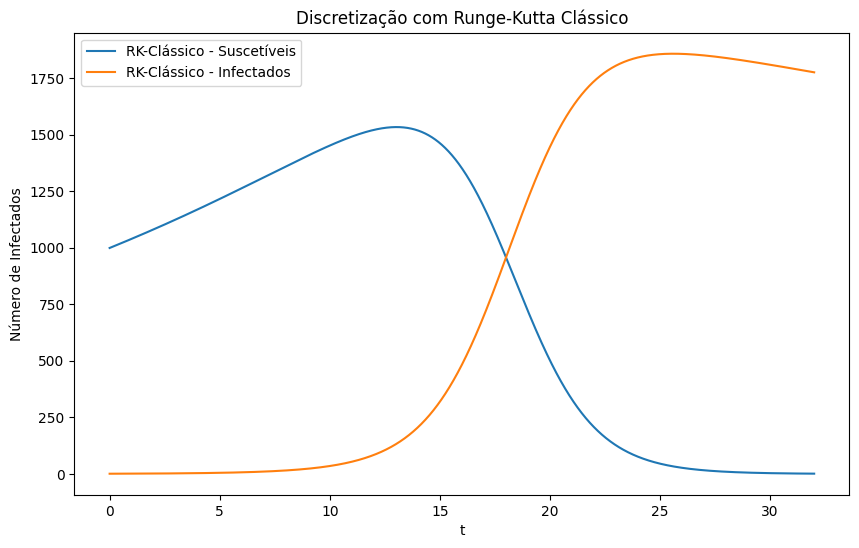

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, s_values, '-', label='RK-Clássico - Suscetíveis')

plt.plot(t_values, i_values, '-', label='RK-Clássico - Infectados')

plt.xlabel('t')

plt.ylabel('Número de Infectados')
plt.title('Discretização com Runge-Kutta Clássico')
plt.legend()
plt.show()


In [105]:
def gera_tabela2(dfs):
    n = [2**6,2**7,2**8,2**9,2**10,2**11,2**12,2**13,2**14]
    s_ordem = []
    t_ordem = []
    for i in range(len(dfs) - 2):
        s_ordem.append( (dfs[i]['Suscetiveis'].iloc[-1] - dfs[i+1]['Suscetiveis'].iloc[-1]) / (dfs[i+1]['Suscetiveis'].iloc[-1] - dfs[i+2]['Suscetiveis'].iloc[-1]))
        t_ordem.append( (dfs[i]['Infectados'].iloc[-1] - dfs[i+1]['Infectados'].iloc[-1]) / (dfs[i+1]['Infectados'].iloc[-1] - dfs[i+2]['Infectados'].iloc[-1]))
        
    s_ordem.append('---')
    s_ordem.append('---')
    t_ordem.append('---')
    t_ordem.append('---')
    tabela_erro2 = pd.DataFrame({
        'n' : n,
        's_ordem' : s_ordem,
        't_ordem' : t_ordem 
    })
    return tabela_erro2

In [106]:
dfs[0].columns

Index(['Tempo ', 'Suscetiveis', 'Infectados'], dtype='object')

In [107]:
tabela2 = gera_tabela2(dfs)
tabela2

,n,s_ordem,t_ordem
0,64,2.081956,2.901834
1,128,2.191342,2.402392
2,256,2.134062,2.195232
3,512,2.076797,2.096759
4,1024,2.040871,2.048241
5,2048,2.021059,2.024095
6,4096,2.010686,2.012042
7,8192,---,---
8,16384,---,---


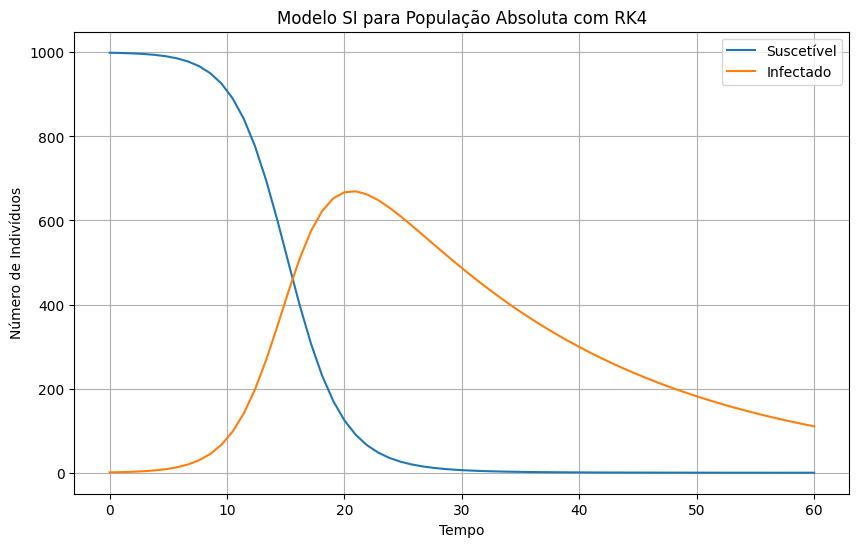

In [108]:
import numpy as np
import matplotlib.pyplot as plt



# Função que retorna dS/dt e dI/dt para população absoluta
def f_SI_abs(t, S, I, teta, u, b):
    dSdt = S * b - (beta*S*I) - S*u
    dIdt = ( beta*S*I) - u*I - teta * I
    return dSdt, dIdt

# O restante do código permanece quase inalterado
def rk4_step_SI(t, S, I, dt, teta, u, b):
    k1_S, k1_I = f_SI_abs(t, S, I, teta, u, b)
    k2_S, k2_I = f_SI_abs(t + dt / 2, S + dt / 2 * k1_S, I + dt / 2 * k1_I,teta, u, b)
    k3_S, k3_I = f_SI_abs(t + dt / 2, S + dt / 2 * k2_S, I + dt / 2 * k2_I,teta, u, b)
    k4_S, k4_I = f_SI_abs(t + dt, S + dt * k3_S, I + dt * k3_I,teta, u, b)

    S_next = S + dt / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_next = I + dt / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    return S_next, I_next

def solve_SI_RK4(T, n, S0, I0,teta, u, b):
    t_n = np.linspace(0, T, n)
    dt = T / (n - 1)
    S_n = [S0]
    I_n = [I0]

    for i in range(1, len(t_n)):
        S_next, I_next = rk4_step_SI(t_n[i-1], S_n[-1], I_n[-1], dt, teta, u, b)
        S_n.append(S_next)
        I_n.append(I_next)

    return t_n, S_n, I_n


beta = 0.0005  # Probabilidade de transmissão por contato * número de contatos

# Parâmetros iniciais para uma população absoluta
T = 60  # Tempo total
n = 64  # Número de pontos
S0 = 999  # Número inicial de suscetíveis
I0 = 1  # Número inicial de infectados
teta = 0.0
u = 0.05
b = 0.05
# Solução
t_n, S_n, I_n = solve_SI_RK4(T, n, S0, I0,teta, u, b)

df_si = pd . DataFrame ({
        'Tempo': t_n ,
        'Suscetiveis': S_n ,
        'Infectados': I_n
    })


df_si . to_csv ('RK_approx.csv')

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(t_n, S_n, label='Suscetível')
plt.plot(t_n, I_n, label='Infectado')
plt.title('Modelo SI para População Absoluta com RK4')
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
# Passo 1: Solução de referência com um passo de tempo muito pequeno
T = 8
S0_ref, I0_ref = S0, I0  # Condições iniciais
n_ref = 10000  # Escolha de um 'n' grande para alta precisão
_, S_ref, I_ref = solve_SI_RK4(T, n_ref, S0_ref, I0_ref, teta, u, b)

# Passo 2 e 3: Resolver para diferentes 'dt' e calcular o erro global
dt_values = [1/2**i for i in range(1, 8)]  # Exemplos de passos de tempo
errors = []  # Para armazenar os erros globais
n_s = []
for dt in dt_values:
    n = int(T / dt) 
    n_s.append(n)
    _, S_n, I_n = solve_SI_RK4(T, n, S0, I0, teta, u, b)
    error_S = np.abs(S_n[-1] - S_ref[-1])
    error_I = np.abs(I_n[-1] - I_ref[-1])
    errors.append(np.sqrt(error_S**2 + error_I**2))  # Norma euclidiana do erro

# Passo 4: Estimar a ordem de convergência
orders = [np.log(errors[i]/errors[i+1])/np.log(2) for i in range(len(errors)-1)]

orders.append('----')

In [110]:
import pandas as pd

tabela_erro2 = pd.DataFrame({
        'n' : n_s,
        'Ordem P' : orders
    })
tabela_erro2

,n,Ordem P
0,16,4.043567
1,32,4.022827
2,64,4.011648
3,128,4.005868
4,256,4.003213
5,512,4.011772
6,1024,----


In [111]:
len(I_n)

1024